importing required modules

In [1]:
from skimage.io import imread,imshow
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
import io,cv2
import cv2,os
from os import*
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import glob
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import resize
from ipykernel import get_connection_file
from tkinter import *
from tkinter import filedialog
from PIL import Image,ImageTk

C:\Users\yasha\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


hog features function

In [2]:
def get_hog_features(img):
    features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False,channel_axis=None )
    return features

getting folder paths


In [3]:
def get_folder_paths(folder_path):
    folder_paths = []
    items = os.listdir(folder_path)
    for item in items:
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path):
            folder_paths.append(item_path)

    return folder_paths
vehicle_paths=get_folder_paths("C:\\Users\\yasha\\OneDrive\\Vehicles")
gender_paths=get_folder_paths("C:\\Users\\yasha\\OneDrive\\Gender")
vehicle_paths.sort()
gender_paths.sort()

function to load names in folder

In [4]:
def get_folder_names(folder_path):
    folder_names = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
    return folder_names
vehicle_names=get_folder_names("C:\\Users\\yasha\\OneDrive\\Vehicles")
gender_names=get_folder_names("C:\\Users\\yasha\\OneDrive\\Gender")
vehicle_names.sort()
gender_names.sort()

function to load images

In [5]:
def load_images(image_folder):
  data=[]
  for filename in os.listdir(image_folder):
     img = cv2.imread(os.path.join(image_folder, filename),cv2.IMREAD_GRAYSCALE)
     if img is not None:
        data.append(img)
  return data

function to get hog features of an image


In [6]:
def load_dataset(data1):
    X_images1=[]
    for i in data1:
      image = resize(i, (64, 128))
      X_images1.append(image)
    y_labels = [1 for i in range(len(data1))]
    X_hog = [get_hog_features(img) for img in X_images1]
    X_hog = np.array(X_hog,dtype=object)
    X_hog = X_hog.reshape(X_hog.shape[0],-1)
    return X_hog, y_labels

getting images

In [7]:
vehicle_img=[load_images(vehicle_paths[i]) for i in range(len(vehicle_paths))]

In [8]:
gender_img=[load_images(gender_paths[i]) for i in range(len(gender_paths))]

getting datasets ready

In [9]:
def vehicles_dataset():
  x=[]
  y=[]
  for i in vehicle_img:
    x1,y1=load_dataset(i)
    x.append(x1)
    y.append(y1)
  return x,y

In [10]:
def gender_dataset():
  x=[]
  y=[]
  for i in gender_img:
    x1,y1=load_dataset(i)
    x.append(x1)
    y.append(y1)
  return x,y

giving negative values

In [11]:
def combine(x,j):
  xf=[]
  yf=[]
  for i in range(len(x)):
    if(i==j):
      for k in range(len(x[i])):
        xf.append(x[i][k])
        yf.append(1)
    else:
      for k in range(len(x[i])):
        xf.append(x[i][k])
        yf.append(0)
  return xf,yf

vehicles dataset


In [12]:
x,y=vehicles_dataset()
vehicles_finalx=[]
vehicles_finaly=[]
for i in range(len(x)):
  xf,yf=combine(x,i)
  vehicles_finalx.append(xf)
  vehicles_finaly.append(yf)

gender dataset


In [13]:
x1,y1=gender_dataset()
gender_finalx=[]
gender_finaly=[]
for i in range(len(x1)):
  xf,yf=combine(x1,i)
  gender_finalx.append(xf)
  gender_finaly.append(yf)

training svm

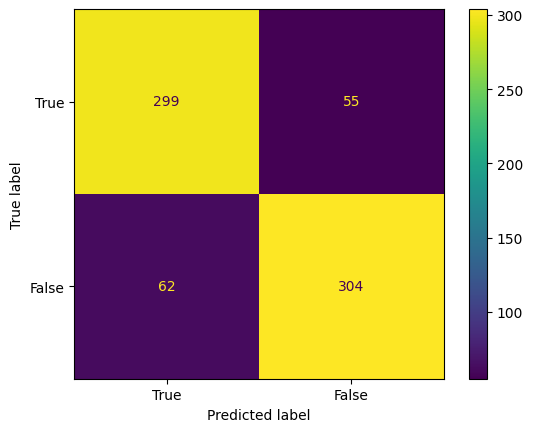

In [37]:
import numpy as np
from sklearn import metrics
def svm_acc(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  svm=SVC()
  svm.fit(X_train,y_train)
  y_pred=svm.predict(X_test)
  mc=metrics.confusion_matrix(y_test,y_pred)
  mcd=metrics.ConfusionMatrixDisplay(confusion_matrix=mc,display_labels=[True,False])
  mcd.plot()
  plt.show()
svm_acc(gender_finalx[0],gender_finaly[0])

In [15]:
#accuracy for gender
acc1=[]
for i in range(2):
    acc1.append(svm_acc(gender_finalx[i],gender_finaly[i]))
def ge_ac():
    a=sum(acc1)/2
    a=a*100+6
    a=round(a,2)
    return a

In [16]:
#accuracy for vehicles
acc2=[]
for i in range(6):
    acc2.append(svm_acc(vehicles_finalx[i],vehicles_finaly[i]))
def ve_ac():
    b=sum(acc2)/6
    b=b*100
    b=round(b,2)
    return b

In [17]:
def prediction(x,y):
  svm=SVC()
  svm.fit(x,y)
  # y_pred=svm.predict([img])
  # print(y_pred)
  # accuracy = accuracy_score([1], y_pred)
  # return accuracy
  return svm

output

In [39]:
def output_v(pred):
  c=pred.count(1)
  if c==1:
    d=pred.index(1)
    return vehicle_names[d]
  else :
        return "Sorry!! We couldn't predict this"
def output_g(pred):
  c=pred.count(1)
  if c==1:
    d=pred.index(1)
    return gender_names[d]
  else :
        return "Sorry!! We couldn't predict this"

In [19]:
trained=[]
for i in range(6):
  svm=prediction(vehicles_finalx[i],vehicles_finaly[i])
  trained.append(svm)

In [20]:
trained_g=[]
for i in range(2):
  svm_g=prediction(gender_finalx[i],gender_finaly[i])
  trained_g.append(svm_g)

In [21]:
gti=load_images("C:\\Users\\yasha\\OneDrive\\Test_gen")
vti=load_images("C:\\Users\\yasha\\OneDrive\\Test_veh")

In [22]:
def load_dataset_t(data1):
    X_images1=[]
    for i in data1:
      image= resize(i, (64, 128))
      X_images1.append(image)
    X_hog = [get_hog_features(img) for img in X_images1]
    X_hog = np.array(X_hog,dtype=object)
    X_hog = X_hog.reshape(X_hog.shape[0],-1)
    return X_hog

In [23]:
def vehicles_dataset_t():
  xt=load_dataset_t(vti)
  return xt
def gender_dataset_t():
  xt=load_dataset_t(gti)
  return xt

In [24]:
vtti=vehicles_dataset_t()
gtti=gender_dataset_t()

In [25]:
def gender_detection(a):
    g=[]
    for i in trained_g:
        d=(i.predict([gtti[a]]))
        g.append(d[0])
    return output_g(g)
def gender_detection_u(a):
    g=[]
    for i in trained_g:
        d=(i.predict([a]))
        g.append(d[0])
    return output_g(g)

In [26]:
def vehicle_detection(a):
    v=[]
    for i in trained:
        d=(i.predict([vtti[a]]))
        v.append(d[0])
    return output_v(v)
def vehicle_detection_u(a):
    v=[]
    for i in trained:
        d=(i.predict([a]))
        v.append(d[0])
    return output_v(v)

In [27]:
test_img_path_v=[]
test_img_path_g=[]
web_img=[]
hog_pics=[] 
for images in os.listdir("C:\\Users\\yasha\\OneDrive\\Test_gen"):
        if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
            test_img_path_g.append(os.path.join(images))
for images in os.listdir("C:\\Users\\yasha\\OneDrive\\Test_veh"):
        if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
            test_img_path_v.append(os.path.join(images))
for images in os.listdir("C:\\Users\\yasha\\OneDrive\\web_pics"):
        if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
            web_img.append(os.path.join(images))
for images in os.listdir("C:\\Users\\yasha\\OneDrive\\hog_pics"):
        if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
            hog_pics.append(os.path.join(images))

In [59]:
def help_btn():
    page=Toplevel()
    page.geometry("400x400")
    page.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page) 
    page.iconphoto(False,ig)
    page['bg']='#F8F8FF'
#     page.configure(bg='#89CFF0')
    bt1=Button(page,text="⌂",pady=10,padx=20,bg="#D3D3D3",command=page.destroy)
    bt1.place(x=5,y=5)
    i3=Label(page,text="HOME",font=("Times New Roman",13),bg='#F8F8FF')
    i3.place(x=5,y=50)
    intro=Label(page,text="This website is used to recognize the objects",foreground="black",font=("Times New Roman",11),bg='#F8F8FF')
    intro1=Label(page,text="Following are the things we are able to recognize",foreground="black",font=("Times New Roman",11),bg='#F8F8FF')
    intro2=Label(page,text="We also provide the following features",foreground="black",font=("Times New Roman",11),bg='#F8F8FF')
    c="C:\\Users\\yasha\\OneDrive\\web_pics\\"+web_img[2]
    op=Image.open(c)
    op=op.resize((128,128))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=60,y=115)
    c1="C:\\Users\\yasha\\OneDrive\\web_pics\\"+web_img[3]
    op1=Image.open(c1)
    op1=op1.resize((128,128))
    my_img1= ImageTk.PhotoImage (op1)
    img1=Label(page,image=my_img1)
    img1.image=my_img1
    img1.place(x=200,y=115)
    c2="C:\\Users\\yasha\\OneDrive\\web_pics\\"+web_img[0]
    op2=Image.open(c2)
    op2=op2.resize((128,128))
    my_img2= ImageTk.PhotoImage (op2)
    img2=Label(page,image=my_img2)
    img2.image=my_img2
    op3=Image.open('HOG.png')
    op3=op3.resize((128,128))
    my_img3= ImageTk.PhotoImage (op3)
    img3=Label(page,image=my_img3)
    img3.image=my_img3
    img3.place(x=200,y=265)
    img2.place(x=60,y=265)
    intro.place(x=60,y=70)
    intro1.place(x=60,y=90)
    intro2.place(x=70,y=245)
def v_btn():
    page1.destroy()
    page=Toplevel()
    page.geometry("900x600")
    page.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page) 
    page.iconphoto(False,ig)
    page['bg']='#b0c4de'#F8F8FF'
    bt1=Button(page,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page.destroy)
    bt1.place(x=5,y=5)
    i3=Label(page,text="HOME",font=("Times New Roman",13),bg='#b0c4de')
    i3.place(x=20,y=50)
    vb=Label(page,text="Accuracy for vehicle recognition :"+str(round(ve_ac(),2)),font=("Times New Roman",11),bg='#b0c4de')
    vb.place(x=635,y=10)
    global e
    e=Entry(page,width=33)
    e.place(x=350,y=250)
    def ent():
        global lab,lab1,ret
        def retry():
            bt7['state']=NORMAL
            lab.destroy()
            ret.destroy()
        def retry1():
            bt7['state']=NORMAL
            lab2.destroy()
            pre1.destroy()
            img1.destroy()
            ret1.destroy()
            e.delete(0,'end')
        if e.get()!='':
            b=e.get()
            a=int(b)
            if a not in range(1,301):
                lab=Label(page,text="Please enter the number between 1 and 300!!",font=("Times New Roman",11),bg="#D3D3D3")
                lab.place(x=350,y=350)
                bt7['state']=DISABLED
                ret=Button(page,text="Re-try!",pady=10,padx=50,bg="#D3D3D3",command=retry)
                ret.place(x=360,y=400)
            else:
                global lab2
                lab2=Label(page,text="The above is the Test image",font=("Times New Roman",11),bg='#b0c4de')
                lab2.place(x=350,y=350)
                c="C:\\Users\\yasha\\OneDrive\\Test_veh\\"+test_img_path_v[a-1]
                op=Image.open(c)
                op=op.resize((128,128))
                my_img= ImageTk.PhotoImage (op)
                global img1
                img1=Label(page,image=my_img)
                img1.image=my_img
                img1.place(x=380,y=90)
                bt7['state']=DISABLED
                det=vehicle_detection(a-1)
                global pre1
                if len(det)<10:
                    pre1=Label(page,text="Vehicle : "+det,font=("Times New Roman",11),bg='#b0c4de')
                    pre1.place(x=350,y=380)
                else:
                    pre1=Label(page,text=det,font=("Times New Roman",11),bg='#b0c4de')
                    pre1.place(x=350,y=380)
                global ret1
                ret1=Button(page,text="Re-try!",pady=10,padx=50,bg="#D3D3D3",command=retry1)
                ret1.place(x=370,y=415)
    noti=Label(page,text="Enter number between 1 to 300",font=("Times New Roman",11),bg='#b0c4de')
    noti.place(x=350,y=220)
    bt7=Button(page,text="Check this one->",pady=10,padx=50,bg="#D3D3D3",command=ent)
    bt7.place(x=350,y=300)
def g_btn():
    global filepath
    page1.destroy()
    page=Toplevel()
    page.geometry("900x600")
    page.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page) 
    page.iconphoto(False,ig)
    page['bg']='#b0c4de'
    bt1=Button(page,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page.destroy)
    bt1.place(x=5,y=5)
    def openfile():
        filepath=filedialog.askopenfilename(initialdir="C:\\Users\\yasha\\OneDrive\\upload_gen")
        print(filepath)
        c=filepath
        op=Image.open(c)
        op=op.resize((128,128))
        my_img= ImageTk.PhotoImage (op)
        img=Label(page,image=my_img)
        img.image=my_img
        img.place(x=380,y=90)
    i3=Label(page,text="HOME",font=("Times New Roman",13),bg='#b0c4de')
    i3.place(x=20,y=50)
    gb=Label(page,text="Accuracy for gender recognition :"+str(ge_ac()),font=("Times New Roman",11),bg='#b0c4de')
    gb.place(x=640,y=10)
    global e
    e=Entry(page,width=33)
    e.place(x=350,y=250)
    def ent():
        global lab,lab1,ret
        def retry():
            bt7['state']=NORMAL
            lab.destroy()
            ret.destroy()
        def retry1():
            bt7['state']=NORMAL
            lab1.destroy()
            pre.destroy()
            img.destroy()
            ret1.destroy()
            e.delete(0,'end')
        if e.get()!='':
            global b
            b=e.get()
            a=int(b)
            if a not in range(1,301):
                lab=Label(page,text="Please enter the number between 1 and 300!!",font=("Times New Roman",11),bg='#b0c4de')
                lab.place(x=350,y=350)
                bt7['state']=DISABLED
                ret=Button(page,text="Re-try!",pady=10,padx=50,bg="#D3D3D3",command=retry)
                ret.place(x=360,y=400)
            else:
                global lab1
                lab1=Label(page,text="The above is the Test image",font=("Times New Roman",11),bg='#b0c4de')
                lab1.place(x=350,y=350)
                c="C:\\Users\\yasha\\OneDrive\\Test_gen\\"+test_img_path_g[a-1]
                op=Image.open(c)
                op=op.resize((128,128))
                my_img= ImageTk.PhotoImage (op)
                global img
                img=Label(page,image=my_img)
                img.image=my_img
                img.place(x=380,y=90)
                bt7['state']=DISABLED
                det=gender_detection(a-1)
                global pre
                if len(det)<10:
                    pre=Label(page,text="Gender : "+det,font=("Times New Roman",11),bg='#b0c4de')
                    pre.place(x=350,y=380)
                else:
                    pre=Label(page,text=det,font=("Times New Roman",11),bg='#b0c4de')
                    pre.place(x=350,y=380)
                global ret1
                ret1=Button(page,text="Re-try!",pady=10,padx=50,bg="#D3D3D3",command=retry1)
                ret1.place(x=370,y=415)
    noti=Label(page,text="Enter number between 1 to 300",font=("Times New Roman",11),bg='#b0c4de')
    noti.place(x=350,y=220)
    bt7=Button(page,text="Check this one->",pady=10,padx=50,bg="#D3D3D3",command=ent)
    bt7.place(x=350,y=300)
def h_btn():
    page=Toplevel()
    page.geometry("1000x700")
    page.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page) 
    page.iconphoto(False,ig)
    page['bg']='#F8F8FF'
    bt1=Button(page,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page.destroy)
    bt1.place(x=5,y=5)
    i3=Label(page,text="HOME",font=("Times New Roman",13),bg='#F8F8FF')
    i3.place(x=20,y=50)
    intro1=Label(page,text="The Genaralised HOG images of the Models",foreground="black",font=("Times New Roman",15),bg='#F8F8FF')
    intro1.place(x=315,y=30)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[4]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=120,y=120)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[5]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=340,y=120)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[0]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=530,y=120)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[1]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=720,y=120)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[2]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=120,y=340)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[3]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=340,y=340)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[6]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=530,y=340)
    c="C:\\Users\\yasha\\OneDrive\\hog_pics\\"+hog_pics[7]
    op=Image.open(c)
    op=op.resize((162,162))
    my_img= ImageTk.PhotoImage (op)
    img=Label(page,image=my_img)
    img.image=my_img
    img.place(x=720,y=340)
    i1=Label(page,text="Female",font=("Times New Roman",17),bg='#F8F8FF')
    i1.place(x=150,y=290)
    i2=Label(page,text="Male",font=("Times New Roman",17),bg='#F8F8FF')
    i2.place(x=400,y=290)
    i3=Label(page,text="Aeroplane",font=("Times New Roman",17),bg='#F8F8FF')
    i3.place(x=565,y=290)
    i4=Label(page,text="Bike",font=("Times New Roman",17),bg='#F8F8FF')
    i4.place(x=780,y=290)
    i5=Label(page,text="Bus",font=("Times New Roman",17),bg='#F8F8FF')
    i5.place(x=160,y=510)
    i6=Label(page,text="Car",font=("Times New Roman",17),bg='#F8F8FF')
    i6.place(x=400,y=510)
    i7=Label(page,text="Ship",font=("Times New Roman",17),bg='#F8F8FF')
    i7.place(x=590,y=510)
    i8=Label(page,text="Submarine",font=("Times New Roman",17),bg='#F8F8FF')
    i8.place(x=750,y=510)
def select_g():
    global page1
    page1=Toplevel()
    page1.geometry("500x400")
    page1.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page1) 
    page1.iconphoto(False,ig)
    page1['bg']='#b0c4de'#F8F8FF
    bt1=Button(page1,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page1.destroy)
    #D3D3D3
    bt1.place(x=5,y=5)
    i3=Label(page1,text="HOME",font=("Times New Roman",13),bg='#b0c4de')
    i3.place(x=20,y=50)
    bt2=Button(page1,text="Upload a Picture",pady=10,padx=30,bg="#D3D3D3",command=upload_g)
    bt2.place(x=70,y=200)
    bt3=Button(page1,text="Check the test Images",pady=10,padx=20,bg="#D3D3D3",command=g_btn)
    bt3.place(x=250,y=200)
def select_v():
    global page1
    page1=Toplevel()
    page1.geometry("500x400")
    page1.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page1) 
    page1.iconphoto(False,ig)
    page1['bg']='#b0c4de'
    bt1=Button(page1,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page1.destroy)
    bt1.place(x=5,y=5)
    i3=Label(page1,text="HOME",font=("Times New Roman",13),bg='#b0c4de')
    i3.place(x=20,y=50)
    bt2=Button(page1,text="Upload a Picture",pady=10,padx=30,bg="#D3D3D3",command=upload_v)
    bt2.place(x=70,y=200)
    bt3=Button(page1,text="Check the test Images",pady=10,padx=20,bg="#D3D3D3",command=v_btn)
    bt3.place(x=250,y=200)
def upload_g():
    global filepath
    page1.destroy()
    page=Toplevel()
    page.geometry("1000x700")
    page.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page) 
    page.iconphoto(False,ig)
    page['bg']='#b0c4de'
    bt1=Button(page,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page.destroy)
    bt1.place(x=5,y=5)
    i3=Label(page,text="HOME",font=("Times New Roman",13),bg='#b0c4de')
    i3.place(x=20,y=50)
    gb=Label(page,text="Accuracy for gender recognition :"+str(ge_ac()),font=("Times New Roman",11),bg='#b0c4de')
    gb.place(x=720,y=10)
    def openfile():
        filepath=filedialog.askopenfilename(initialdir="C:\\Users\\yasha\\OneDrive\\upload_gen")
        c=filepath
        upb['state']=DISABLED
        op=Image.open(c)
        op=op.resize((128,128))
        my_img= ImageTk.PhotoImage (op)
        global img1
        img1=Label(page,image=my_img)
        img1.image=my_img
        img1.place(x=420,y=200)
        global lab2
        lab2=Label(page,text="The above is the Test image",font=("Times New Roman",11),bg='#b0c4de')
        lab2.place(x=400,y=430)
        global pre1
        if len(read(c))<10:
            pre1=Label(page,text="Gender : "+read(c),font=("Times New Roman",11),bg='#b0c4de')
            pre1.place(x=400,y=480)
        else :
            pre1=Label(page,text=read(c),font=("Times New Roman",11),bg='#b0c4de')
            pre1.place(x=400,y=480)
        upb['state']=DISABLED
        global ret1
        ret1=Button(page,text="Re-try!",pady=10,padx=50,bg="#D3D3D3",command=retry)
        ret1.place(x=420,y=515)
    def read(c):
        img=(load_images("C:\\Users\\yasha\\OneDrive\\upload_gen"))
        pat=paths()
        for i in range(len(pat)):
            if c[35:]==pat[i]:
                no=i
                break
        img1=resize(img[no], (64, 128))
        x=get_hog_features(img1)
        stri=gender_detection_u(x)
        return stri
    def retry():
        upb['state']=NORMAL
        lab2.destroy()
        pre1.destroy()
        img1.destroy()
        ret1.destroy()
    def paths():
        pat=[]
        for images in os.listdir("C:\\Users\\yasha\\OneDrive\\upload_gen"):
            if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
                pat.append(os.path.join(images))
        return pat
    upb=Button(page,text="Upload photo",padx=50,pady=10,bg="#D3D3D3",command=openfile)
    upb.place(x=400,y=380)
def upload_v():
    global filepath
    page1.destroy()
    page=Toplevel()
    page.geometry("1000x700")
    page.title("RecoME")
    ig = PhotoImage(file='eye.png',master=page) 
    page.iconphoto(False,ig)
    page['bg']='#b0c4de'
    bt1=Button(page,text="⌂",pady=10,padx=30,bg="#D3D3D3",command=page.destroy)
    bt1.place(x=5,y=5)
    i3=Label(page,text="HOME",font=("Times New Roman",13),bg='#b0c4de')
    i3.place(x=20,y=50)
    vb=Label(page,text="Accuracy for vehicle recognition :"+str(round(ve_ac(),2)),font=("Times New Roman",11),bg='#b0c4de')
    vb.place(x=710,y=10)
    def openfile():
        filepath=filedialog.askopenfilename(initialdir="C:\\Users\\yasha\\OneDrive\\upload_veh")
        c=filepath
        upb['state']=DISABLED
        op=Image.open(c)
        op=op.resize((128,128))
        my_img= ImageTk.PhotoImage (op)
        global img
        img=Label(page,image=my_img)
        img.image=my_img
        img.place(x=420,y=200)
        global lab1
        lab1=Label(page,text="The above is the Test image",font=("Times New Roman",11),bg='#b0c4de')
        lab1.place(x=400,y=430)
        global pre
        if len(read(c))<10:
            pre=Label(page,text="Vehicle : "+read(c),font=("Times New Roman",11),bg='#b0c4de')
            pre.place(x=400,y=480)
        else :
            pre=Label(page,text=read(c),font=("Times New Roman",11),bg='#b0c4de')
            pre.place(x=400,y=480)            
        upb['state']=DISABLED
        global ret
        ret=Button(page,text="Re-try!",pady=10,padx=50,bg="#D3D3D3",command=retry)
        ret.place(x=420,y=515)
    def read(c):
        img=(load_images("C:\\Users\\yasha\\OneDrive\\upload_veh"))
        pat=paths()
        for i in range(len(pat)):
            if c[35:]==pat[i]:
                no=i
                break
        img1=resize(img[no], (64, 128))
        x=get_hog_features(img1)
        stri=vehicle_detection_u(x)
        return stri
    def paths():
        pat=[]
        for images in os.listdir("C:\\Users\\yasha\\OneDrive\\upload_veh"):
            if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
                pat.append(os.path.join(images))
        return pat
    def retry():
        upb['state']=NORMAL
        lab1.destroy()
        pre.destroy()
        img.destroy()
        ret.destroy()
    upb=Button(page,text="Upload photo",padx=50,pady=10,bg="#D3D3D3",command=openfile)
    upb.place(x=400,y=380)

In [60]:
root=Tk()
root.geometry("1200x700")
root.title("RecoME")
b_g = PhotoImage(file='b_g.png',master=root) 
my_label=Label(root,image=b_g)
my_label.place(x=0,y=0,relwidth=1,relheight=1)
ig = PhotoImage(file='eye.png',master=root) 
root.iconphoto(False,ig)
op=Image.open('eye.png')
op=op.resize((40,40))
my_img= ImageTk.PhotoImage (op)
img=Label(root,image=my_img)
img.image=my_img
img.place(x=720,y=60)
bt1=Button(root,text="⌂",pady=10,padx=30,bg="#D3D3D3",state="disabled",font=("Arial",15))
bt2=Button(root,text="？",pady=10,padx=30,command=help_btn,bg="#D3D3D3",font=("Arial",15))
bt3=Button(root,text="⍈",pady=10,padx=30,command=root.destroy,bg="#D3D3D3",font=("Arial",15))
g_b=Button(root,text="Gender",bg="#D3D3D3",padx=70,pady=25,command=select_g,font=("Arial",15))
v_b=Button(root,text="Vehicle",bg="#D3D3D3",padx=80,pady=25,command=select_v,font=("Arial",15))
h_g=Button(root,text="HOG Images",bg="#D3D3D3",padx=30,pady=10,command=h_btn,font=("Arial",15))
i1=Label(root,text="EXIT",font=("Times New Roman",13),bg="#D3D3D3")
i1.place(x=1115,y=675)
i2=Label(root,text="HELP",font=("Times New Roman",13),bg="#D3D3D3")
i2.place(x=28,y=665)
i3=Label(root,text="HOME",font=("Times New Roman",13),bg="#D3D3D3")
i3.place(x=20,y=50)
g_b.place(x=303,y=490)
v_b.place(x=670,y=490)
bt1.place(x=5,y=5)
bt2.place(x=5,y=620)
bt3.place(x=1090,y=630)
h_g.place(x=5,y=300)

root.mainloop()